In [1]:
!pip install transformers

In [2]:
!pip install datasets

In [3]:
import datasets
from datasets import list_datasets

In [4]:
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the hub")
print(f"The first 10 are: {all_datasets[:10]}")

<ipython-input-4-800e747d0b44>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


There are 69069 datasets currently available on the hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [5]:
#Loading Emotion dataset using "load_dataset()" function.

from datasets import load_dataset
emotions = load_dataset("emotion")

In [6]:
print(emotions)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [7]:
train_data = emotions["train"]

In [8]:
print("Print train data",train_data)

print("Print length of traindata",len(train_data))

print("Print first row of train data",train_data[0])

print("Print the column names of the train data",train_data.column_names)

print("printing the features",train_data.features)

print("Printing the training data from 0 - 5",train_data[:7])

print("Printing data in lists",train_data["text"][:7])

Print train data Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})
Print length of traindata 16000
Print first row of train data {'text': 'i didnt feel humiliated', 'label': 0}
Print the column names of the train data ['text', 'label']
printing the features {'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}
Printing the training data from 0 - 5 {'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy', 'ive been feeling a little burdened lately wasnt sure why that was', 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny'], 'label': [0, 0, 3, 2, 3, 0, 5]}
Print

In [9]:
#From datasets to DataFrame.

import pandas as pd

emotions.set_format(type="pandas")
data_frame = emotions["train"][:]
print(data_frame.head())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [10]:
#Creating a new coloumn in our DataFrame with corresponding labels.

def label_int_to_str(row):
    return emotions["train"].features["label"].int2str(row)

data_frame["label_name"] = data_frame["label"].apply(label_int_to_str)
print(data_frame.head())

                                                text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger


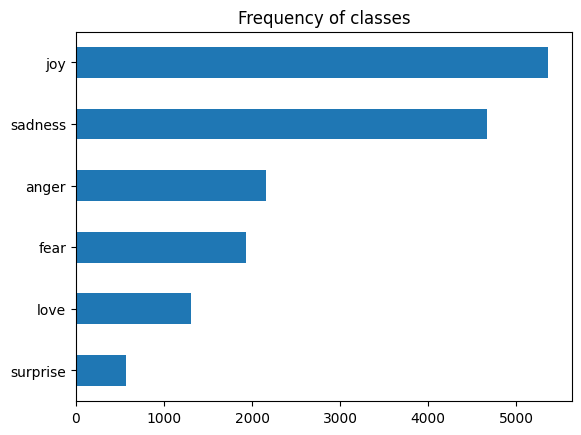

None


In [11]:
#Looking at class distribution.

import matplotlib.pyplot as plt

data_frame["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of classes")
print(plt.show())

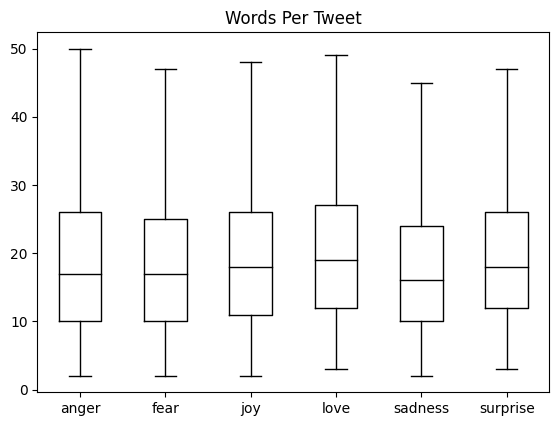

None


In [12]:
#How long are the tweets.

data_frame["Words Per Tweet"] = data_frame["text"].str.split().apply(len)
data_frame.boxplot("Words Per Tweet", by = "label_name", grid = False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
print(plt.show())

In [13]:
emotions.reset_format()

In [14]:
#Word Tokenization.

text = "I am eating an apple that is green in color."
#Using Split function for word tokenization.
tokenized_text = text.split()
print(tokenized_text)

['I', 'am', 'eating', 'an', 'apple', 'that', 'is', 'green', 'in', 'color.']


In [15]:
#Subword tokenization is the combination of character and word tokenization.

from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)


encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2572, 5983, 2019, 6207, 2008, 2003, 2665, 1999, 3609, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [16]:
#Converting the ids back to tokens.

tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'i', 'am', 'eating', 'an', 'apple', 'that', 'is', 'green', 'in', 'color', '.', '[SEP]']


In [17]:
#Here we are converting tokens to stings.
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] i am eating an apple that is green in color. [SEP]


In [18]:
#See the vocabulary of the tokenizer.
print(tokenizer.vocab_size)

30522


In [19]:
#Seeing the model's maximum context size.
print(tokenizer.model_max_length)

512


In [20]:
#Fields that model expects in its forward pass.
print(tokenizer.model_input_names)

['input_ids', 'attention_mask']


In [21]:
#Tokenizing the whole dataset.

def tokenize(batch):
    return tokenizer(list(batch["text"]),padding=True, truncation=True)

In [22]:
#Passing the two examples of training into the function.

print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [23]:
#applying tokenize on th whole training set.

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [24]:
#There are two options to train a model.
# 1. Feature extraction.
# 2. Fine Tuning.

# First, Transformers are used as Feature extractors.

from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda"if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
#Extracting the last hidden states

text = "This fruit is nothing but an apple."
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape:{inputs['input_ids'].size()}")

Input tensor shape:torch.Size([1, 10])


In [26]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1653, -0.0026, -0.0186,  ..., -0.0126,  0.2720,  0.1901],
         [-0.0964,  0.1354, -0.1138,  ..., -0.2657,  0.5206, -0.0027],
         [ 0.2793,  0.3597, -0.1561,  ..., -0.0920,  0.0049, -0.7285],
         ...,
         [ 0.0901,  0.2763, -0.0567,  ...,  0.1690, -0.2180, -0.8240],
         [ 0.7083,  0.0907, -0.5787,  ...,  0.1850, -0.3306, -0.5893],
         [ 0.4894,  0.4299,  0.0554,  ...,  0.1237, -0.0119, -0.4633]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [27]:
print("This is the last hidden state of the model, It has batch size, n_tokens, hidden_dimensions",outputs.last_hidden_state.size())

This is the last hidden state of the model, It has batch size, n_tokens, hidden_dimensions torch.Size([1, 10, 768])


In [28]:
#This is the way to get the last hidden state  for a single string.
print(outputs.last_hidden_state[:,0].size())

torch.Size([1, 768])


In [29]:
#Extracting all the hidden states of the training.

def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}
#Extract last hidden states.
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
#Return vector for CLS token
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [30]:
#Converting the inputids and attention_mask to torch format.
emotions_encoded.set_format("torch",
                            columns=["input_ids","attention_mask","label"])

In [31]:
emotions_hidden  = emotions_encoded.map(extract_hidden_states, batched=True)

In [32]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [33]:
#Creating feature matrix.
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
X_test = np.array(emotions_hidden["test"]["hidden_state"])
Y_train = np.array(emotions_hidden["train"]["label"])
Y_valid = np.array(emotions_hidden["validation"]["label"])
Y_test = np.array(emotions_hidden["test"]["label"])
print(X_train.shape,X_valid.shape)

(16000, 768) (2000, 768)


In [34]:
#Visualizing the training set.
!pip uninstall umap
!pip install umap-learn -i https://mirrors.ustc.edu.cn/pypi/web/simple
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple


In [35]:
#Scale features from 0 to 1
X_scaled = MinMaxScaler().fit_transform(X_train)
#Intitilize and fit UMAP.
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
#Create a DataFrame of 2D embeddings.
df_emb = pd.DataFrame(mapper.embedding_, columns=["X","Y"])
df_emb["label"] = Y_train
df_emb.head()

,X,Y,label
0,4.057785,7.089060,0
1,-3.050777,6.062093,0
2,5.232751,3.716058,3
3,-2.459334,4.061517,2
4,-3.414643,4.157630,3


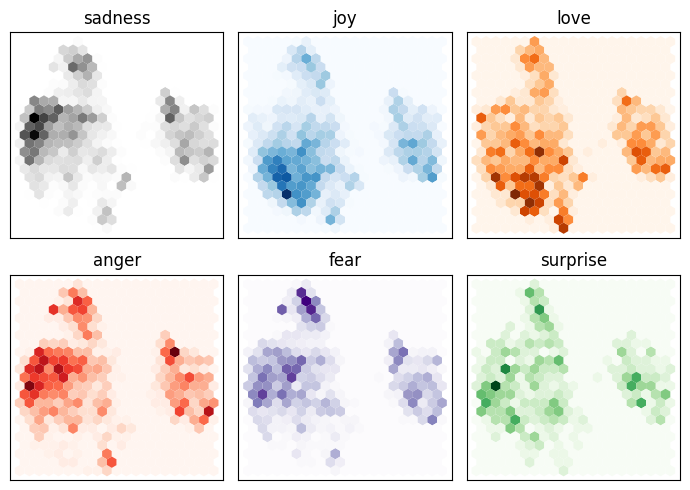

In [36]:
fig, axes = plt.subplots(2,3,figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues","Oranges","Reds","Purples","Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  def_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(def_emb_sub["X"], def_emb_sub["Y"], cmap=cmap,
                 gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [76]:
#Training simple classifier.
from sklearn.linear_model import LogisticRegression

lg_c = LogisticRegression(max_iter=3000)
lg_c.fit(X_train, Y_train)
lg_c.score(X_valid,Y_valid)

0.6335

In [38]:
#Logistic regression on test
lg_c.score(X_test,Y_test)

0.627

In [39]:
from sklearn.dummy import DummyClassifier

dummy_c = DummyClassifier(strategy="most_frequent")
dummy_c.fit(X_train, Y_train)
dummy_c.score(X_valid, Y_valid)

0.352

In [40]:
#Dummy classifier on test
dummy_c.score(X_test, Y_test)

0.3475

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Noramlised confusion matrix")
  plt.show()

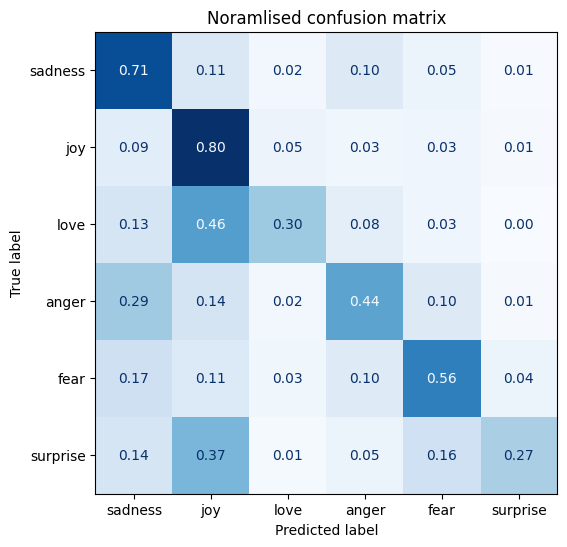

In [42]:
#Confusion matrix of logistic regression on validation data
Y_preds = lg_c.predict(X_valid)
plot_confusion_matrix(Y_preds, Y_valid, labels)

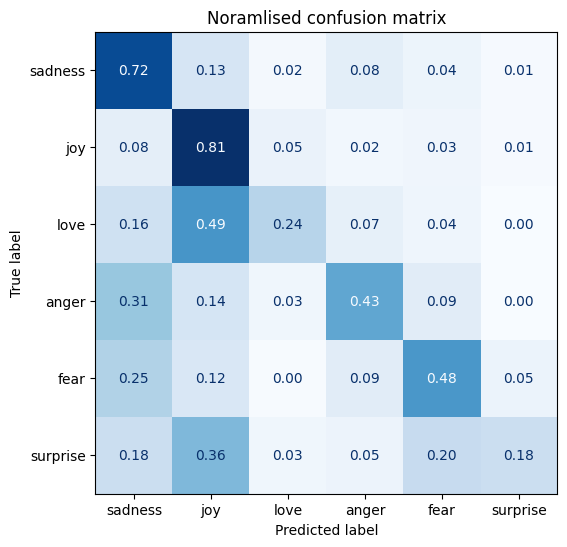

In [43]:
#Confusion matrix of logistic regression on test data
Y_preds = lg_c.predict(X_test)
plot_confusion_matrix(Y_preds, Y_test, labels)

In [44]:
#Fine Tuning Transformers.

#Loading a pretrained model.

from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'classifier.

In [45]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels,preds)
  return {"accuracy": acc, "f1": f1}

In [46]:
!pip install accelerate -U

In [47]:
# Here we are importing the EarlyStoppingCallback, IntervalStrategy, Trainer, and TrainingArguments classes from the transformers library.
from transformers import EarlyStoppingCallback, IntervalStrategy,Trainer, TrainingArguments

In [48]:
!pip install transformers==4.28.0

In [49]:
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs=2,
                                  learning_rate = 2e-5,
                                  per_device_train_batch_size = batch_size,
                                  per_device_eval_batch_size = batch_size,
                                  weight_decay = 0.01,
                                  evaluation_strategy = "epoch",
                                  disable_tqdm = False,
                                  logging_steps=logging_steps,
                                  log_level="error")

In [50]:
from transformers import Trainer

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,
    compute_metrics = compute_metrics, # training arguments, defined above
    train_dataset=emotions_encoded["train"],         # training dataset
    eval_dataset= emotions_encoded["validation"],
    tokenizer = tokenizer)

trainer.train();

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.825700,0.308781,0.905000,0.901566
2,0.245600,0.212200,0.928500,0.928364


In [51]:
#Evaluating model using test data
preds_output = trainer.predict(emotions_encoded["test"])

In [52]:
print(preds_output.metrics)

{'test_loss': 0.20939329266548157, 'test_accuracy': 0.9235, 'test_f1': 0.9228122640840793, 'test_runtime': 3.6753, 'test_samples_per_second': 544.169, 'test_steps_per_second': 8.707}


In [53]:
Y_preds = np.argmax(preds_output.predictions, axis=1)

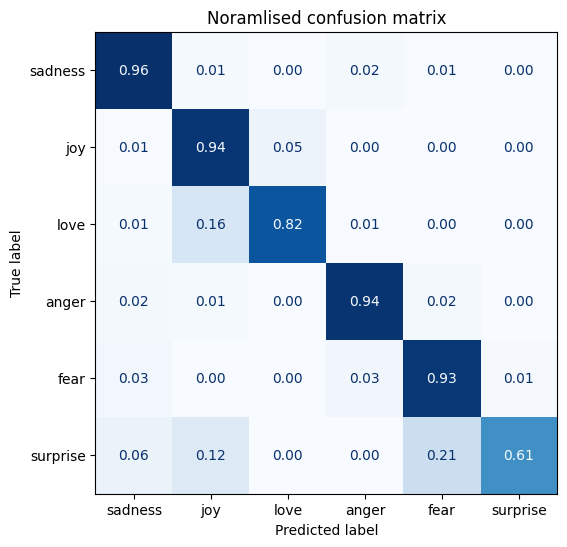

In [54]:
#Confusion matrix of test data
plot_confusion_matrix(Y_preds,Y_test, labels)

In [72]:
#Evaluating the model on validation data
preds_output = trainer.predict(emotions_encoded["validation"])

In [73]:
print(preds_output.metrics)

{'test_loss': 0.21219997107982635, 'test_accuracy': 0.9285, 'test_f1': 0.9283635488854662, 'test_runtime': 4.9586, 'test_samples_per_second': 403.338, 'test_steps_per_second': 6.453}


In [74]:
Y_preds = np.argmax(preds_output.predictions, axis=1)

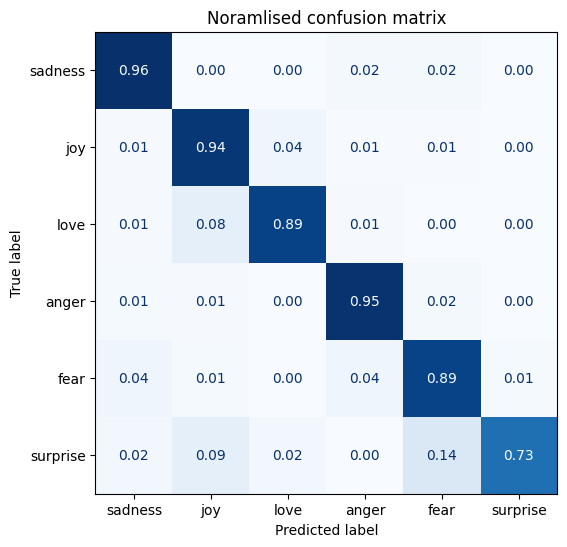

In [75]:
#Confusion matrix of the validation data
plot_confusion_matrix(Y_preds,Y_valid, labels)

#Fine Tuning with Keras.

In [55]:
!pip install -U tensorflow==2.10

In [56]:
from transformers import TFAutoModelForSequenceClassification
tf_model = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels))

In [57]:
#The column names to convert to TensorFlow tensors.
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded["train"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=True,
batch_size=batch_size)

tf_eval_dataset = emotions_encoded["validation"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=False,
batch_size=batch_size)

tf_test_dataset = emotions_encoded["test"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=False,
batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:400: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [58]:
import tensorflow as tf

tf_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = tf.metrics.SparseCategoricalAccuracy())

In [59]:
#Evaluating the keras model on validation data
tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

Epoch 1/2
250/250 [==============================] - 159s 561ms/step - loss: 0.5283 - sparse_categorical_accuracy: 0.8152 - val_loss: 0.1981 - val_sparse_categorical_accuracy: 0.9255
Epoch 2/2
250/250 [==============================] - 138s 553ms/step - loss: 0.1432 - sparse_categorical_accuracy: 0.9386 - val_loss: 0.1354 - val_sparse_categorical_accuracy: 0.9375


In [60]:
#Evaulating the model on the test data
tf_model.fit(tf_train_dataset, validation_data=tf_test_dataset, epochs=2)

Epoch 1/2
250/250 [==============================] - 139s 557ms/step - loss: 0.1067 - sparse_categorical_accuracy: 0.9503 - val_loss: 0.1550 - val_sparse_categorical_accuracy: 0.9275
Epoch 2/2
250/250 [==============================] - 136s 545ms/step - loss: 0.0845 - sparse_categorical_accuracy: 0.9597 - val_loss: 0.1872 - val_sparse_categorical_accuracy: 0.9210


#Error Analysis

In [61]:
from torch.nn.functional import cross_entropy

In [62]:
def forward_pass_with_label(batch):
  #Place all input tensors on the same device as the model.
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}

  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device),
                         reduction="none")
  #place the outputs on the cpu for computability eith other dataset columns.
  return {"loss": loss.cpu().numpy(),
          "predicted_label": pred_label.cpu().numpy()}

In [63]:
#We apply map() we apply this function to get the loss for  all the samples.
#Convert the data to pytorch.
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask","label"])

#compute loss values.
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [64]:
emotions_encoded["test"] = emotions_encoded["test"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [65]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

In [66]:
#we create DataFrame with texts, losses and prdicted/true labels # Validation data
emotions_encoded.set_format("pandas")
cols = ["text","label","predicted_label","loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [67]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1963,i called myself pro life and voted for perry w...,joy,sadness,5.361325
465,i would eventually go in to these stores but i...,joy,fear,5.186733
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.994108
1274,i am going to several holiday parties and i ca...,joy,sadness,4.975378
1509,i guess this is a memoir so it feels like that...,joy,fear,4.956842
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.925647
1801,i feel that he was being overshadowed by the s...,love,sadness,4.883249
1111,im lazy my characters fall into categories of ...,joy,fear,4.880451
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.815602
765,i feel super awkward and out of place right now,joy,sadness,4.784258


In [68]:
df_test.sort_values("loss", ascending=True).head(25)

,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.015573
578,i got to christmas feeling positive about the ...,joy,joy,0.016177
11,i was dribbling on mums coffee table looking o...,joy,joy,0.016840
19,i had lunch with an old friend and it was nice...,joy,joy,0.016847
1320,im feeling positive but its impossible to desc...,joy,joy,0.016952
1101,im feeling good i increase,joy,joy,0.017007
1675,i know i cannot rest of my laurels and its a a...,joy,joy,0.017090
21,i feel try to tell me im ungrateful tell me im...,sadness,sadness,0.017105
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.017125
802,i hate hate hate watching people work and me s...,joy,joy,0.017136


In [69]:
#we create DataFrame with texts, losses and prdicted/true labels # Test data
emotions_encoded.set_format("pandas")
cols = ["text","label","predicted_label","loss"]
df_test = emotions_encoded["test"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [70]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1382,i cannot even begin to express in words the de...,surprise,sadness,5.614270
816,whenever i put myself in others shoes and try ...,anger,joy,5.370595
1613,i feel very cheated since i am supporting the ...,joy,sadness,5.152736
1533,i actually was in a meeting last week where so...,anger,sadness,4.976582
290,i just feel are ludicrous and wasting space or...,surprise,sadness,4.901397
1253,i don t feel betrayed coz the backstabber had ...,surprise,sadness,4.888608
1431,i felt a stronger wish to be free from self ch...,sadness,joy,4.852174
125,i feel very mislead by someone that i really r...,love,sadness,4.678326
1020,i know is that she s here and i m so thankful ...,sadness,joy,4.576581
863,i feel betrayed and angry and sad at the same ...,anger,sadness,4.442087


In [71]:
df_test.sort_values("loss", ascending=True).head(25)

,text,label,predicted_label,loss
547,i feel a little virtuous doing these things bu...,joy,joy,0.015686
116,i feel thoroughly virtuous even if the daily t...,joy,joy,0.016040
1410,i am feeling joyful every part of me feels hap...,joy,joy,0.016055
843,i feel more virtuous just looking at the pictu...,joy,joy,0.016118
35,i feel more virtuous than when i eat veggies d...,joy,joy,0.016181
911,i love doing yoga i love learning about it i l...,joy,joy,0.016296
1359,im feeling quite positive in what i want to ac...,joy,joy,0.016408
1105,im now on day two of the plan and im feeling p...,joy,joy,0.016439
956,i woke up very early this morning feeling joyful,joy,joy,0.016447
1028,i just feel so virtuous when we go on a fieldtrip,joy,joy,0.016567
